# Support Vector Machines (SVM) 

Support vector machines (SVMs) é um metodo de machine learning usado para classificação e regressão.<br>
Uma máquina de vetores de suporte constrói um hiperplano ou um conjunto de hiperplanos em um espaço de alta ou infinita dimensão.

**Advantages**:

* Eficaz em multiplos espaços dimensionais.
* O SVM funciona bem com uma margem de separação clara e com multiplos espaços dimensionais.
* Usa um subconjunto de pontos de treinamento na função de decisão (chamados vetores de suporte), portanto, também é **eficiente em termos de memória**.
* Versátil: diferentes funções do Kernel podem ser especificadas para a função de decisão. Os kernels comuns são fornecidos, mas também é possível especificar kernels customizados.

**Disadvantages**:

* Ele funciona mal com classes sobrepostas 
* É sensível ao tipo de kernel usado.
* O SVM não é adequado para conjuntos de dados grandes devido ao seu alto tempo de treinamento e também leva mais tempo no treinamento em comparação aos Naïve Bayes. 

A principal diferença do SVM para outros algoritmos de classificação é a maneira que escolhe o limite de decisão. Usando margens, ele maximiza a distância dos pontos de dados mais próximos de todas as classes.

<img src="images/output_3_0.jpeg" />

## Margin

Em vez de simplesmente desenhar uma linha de largura zero entre as classes, podemos desenhar em torno de cada linha uma margem.

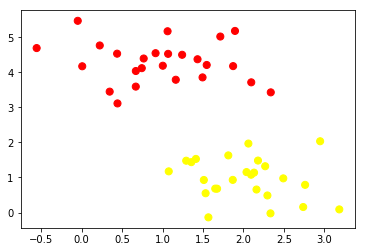

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

<img src="images/output_5_00.png" />

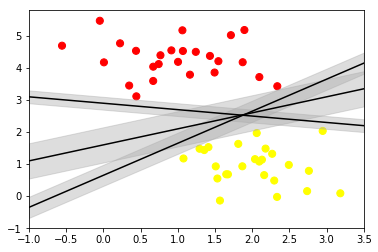

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

<img src="images/output_6_00.png" />

## Kernel

SVM possuem 3 tipos de kernels comuns:
* linear
* polynomial
* radial<br/>

Alguns problemas não podem ser resolvidos usando o hiperplano linear, como mostrado na figura abaixo.

In [21]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

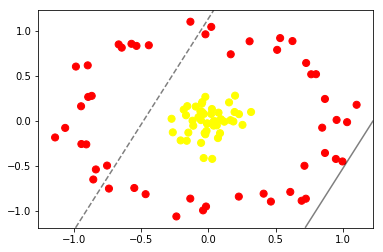

In [22]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

<img src="images/output_10_00.png" />

<img src="images/output_11_0.png" />

## Polynomial Kernel

Há situações em que não é possivel dividir com uma boa precisão um conjunto de dados. <br/>
Um kernel = linear não funciona.

<img src="images/output_14_0.png" />

Neste caso, devemos colocar os dados em 2 dimensões (X, Y).

Depois devemos inserir os dados na parábola (y = x**2)

<img src="images/output_16_0.png" />

A partir de agora já podemos traçar uma linha e ter com precisão a melhor divisão.

<img src="images/output_18_0.png" />

## Comparison between linear kernel and polynomial kernel

<img src="images/output_20_0.png" />

<img src="images/output_21_0.png" />

<img src="images/output_22_0.png" />

## RBF KERNEL 

A técnica de RBF KERNEL - Radial Basis Function (RBF) - cria uma cordilheira (função radial) para dividir os dados em 2 planos.

<img src="images/output_25_0.png" />

Separa os pontos numa radial onde os pontos vermelhos fiquem no alto e os pontos azuis embaixo.<br/>

<img src="images/output_27_0.png" />

<img src="images/output_28_0.png" />

**GAMA**

- Essa separação é o parâmetro GAMA (0 - 1).
- Um valor mais alto de gama se ajustará perfeitamente ao conjunto de dados de treinamento, o que causa ajuste excessivo. Gama = 0,1 é considerado um bom valor padrão. 

<img src="images/output_30_0.png" />

<img src="images/output_31_0.png" />

<img src="images/output_32_0.png" />

## C Parameter

- O parâmetro C é a flexibilidade do modelo. Este parâmetro multiplica o erro de classificação.
- DEFAULT = 1

<img src="images/output_35_0.png" />

<img src="images/output_36_0.png" />

<img src="images/output_37_0.png" />

## Parameters

* `C`: O parâmetro C.
* `kernel`: O kernel. As mais comuns são 'linear', 'poly' e 'rbf'.
* `degree`: Se o kernel é polinomial, este é o grau máximo dos monômios no kernel.
* `gamma` : Se o kernel é rbf, este é o parâmetro de gama.

Different kernels are specified by keyword kernel at initialization.
Examples:

`model = SVC(kernel='linear')`

`model = SVC(kernel='poly', degree=4)`

`model = SVC(kernel='rbf', gama=15)`


- OBS:**Tamanho do cache para o KERNEL**: para SVC, SVR, nuSVCe NuSVR, o tamanho do cache de kernel tem um forte impacto sobre os tempos de execução para problemas maiores. Se você tiver RAM suficiente disponível, é recomendável definir cache_sizeum valor maior que o padrão de 200 (MB), como 500 (MB) ou 1000 (MB).

### References

- http://scikit-learn.org/stable/modules/svm.html
- https://en.wikipedia.org/wiki/Kernel_method
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html